# Week 8 Regression in Application

The exercises of this notebook contains several case studies based on different datasets. Please do
 consider the methods and approaches we introduced in the pre-recorded lecture DEMO to conduct
 the analysis. Additional regression assumption tests and utilising ression model to make prediction
 are also introduced in this notebook

In [3]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 65.0 MB/s eta 0:00:00


In [4]:
# importing all the package we need in this notebook 
import pandas as pd 
import seaborn as sns 
import statsmodels.formula.api as smf 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

## Case 1 Background

 Many companies manufacture products that are at least partially produced using chemicals (e.g.,
 paint, gasoline, and steel). In many cases, the quality of the finished product is a function of the
 temperature and pressure at which the chemical reactions take place. Suppose that a particular
 manufacturer wants to **model the quality (Y) of a product as a function of the temperature (X1) and
 the pressure (X2)** at which it is produced.

 The dataset week8_1_product_quality.csv contains data obtained from a
 carefully designed experiment involving these variables. Note that the assigned quality score can
 range from a minimum of 0 to a maximum of 100 for each manufactured product

### Q1-a 
 Estimate a multiple regression equation that includes the two given explanatory variables. Does the
 estimated equation fit the data well?

In [5]:
df_listing1 = pd.read_csv("./src/week8_1_product_quality.csv")
df_listing1.head()

,Product,Quality,Temperature,Pressure
0,1,71.3,90,60
1,2,73.0,80,60
2,3,70.9,90,60
3,4,73.2,100,55
4,5,97.4,90,55


In [6]:
model = smf.ols(formula='Quality~Pressure+Temperature',data=df_listing1) 
results = model.fit() 
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     3.220
Date:                Mon, 16 Sep 2024   Prob (F-statistic):             0.0577
Time:                        17:22:09   Log-Likelihood:                -112.69
No. Observations:                  27   AIC:                             231.4
Df Residuals:                      24   BIC:                             235.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     106.0852     55.945      1.896      

### Q1-b
 
Add an interaction term between temperature and pressure and run the regression again.

Does the inclusion of the interaction term improve the model’s goodness of fit?

In [7]:
model = smf.ols(formula="Quality~Pressure+Temperature+Temperature:Pressure",data=df_listing1)
results = model.fit() 
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.080
Date:                Mon, 16 Sep 2024   Prob (F-statistic):             0.0475
Time:                        17:33:20   Log-Likelihood:                -111.34
No. Observations:                  27   AIC:                             230.7
Df Residuals:                      23   BIC:                             235.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -614.1398 

### Q1-c
Interpret each of the estimated coefficients in the two equations. How are they different? 

How do you interpret the coefficient for the interaction term in the second equation?

## Case 2 - Background

 A power company located in southern Alabama wants to predict the peak power load (i.e., the
 maximum amount of power that must be generated each day to meet demand) as a function of the
 daily high temperature (X). A random sample of summer days is chosen, and the peak power load
 and the high temperature are recorded each day.

 The dataset week8_2_alabama_company.csv contains these observations.

### Q2-a

Create a scatterplot for these data. Comment on the observed relationship between Y and X.

In [9]:
df_peakpower = pd.read_csv("./src/week8_2_alabama_company.csv")
df_peakpower.head()

,Day,Peak Load,Daily High Temperature
0,1,118.5,89
1,2,136.0,94
2,3,143.6,100
3,4,153.2,97
4,5,140.7,95


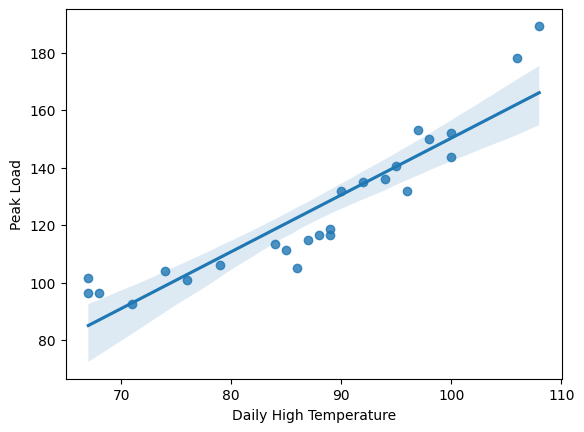

In [10]:
import matplotlib.pyplot as plt

scatter, ax = plt.subplots() 
ax = sns.regplot(x='Daily High Temperature',y='Peak Load',data=df_peakpower) 
plt.show() 

Comment: the relationship between peak load and daily high temperature is simple linear
 regression

### Q2-b
Estimate an appropriate regression equation to predict the peak power load for this power company. Interpret the estimated regression coefficients.

In [12]:
df_new_peakpower = df_peakpower.rename(columns={"Daily High Temperature": "Daily_High_Temperature", "Peak Load": "Peak_Load"})
model = smf.ols(formula='Peak_Load ~ Daily_High_Temperature',data=df_new_peakpower) 
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Peak_Load   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           9.82e-11
Time:                        17:43:31   Log-Likelihood:                -92.792
No. Observations:                  25   AIC:                             189.6
Df Residuals:                      23   BIC:                             192.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -47

Comment: As the daily high temperature increases, the peak power load rises 1.9765 unit.

### Q2-c

What else we can do for improving the model fit?
 
Here, we can analyse the estimated equation’s residuals by illustrating a scatterplot. This is not the
scatterplot of the observations, but the residuals (residuals=observed-predicted). We can create a
residual vs. fitted plot by using the sm.graphics.plot_regress_exog function from the
statsmodels library:

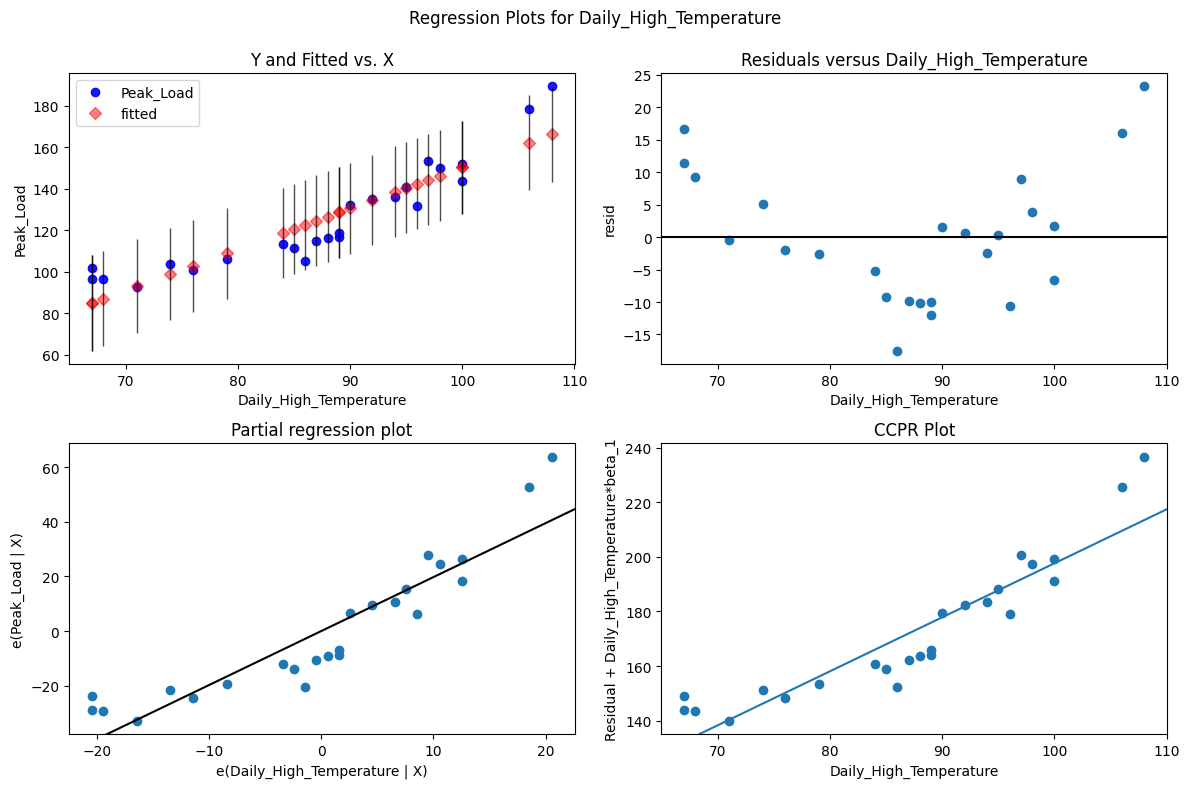

In [13]:
model = smf.ols(formula='Peak_Load ~ Daily_High_Temperature', data=df_new_peakpower).fit()
#define figure size
fig = plt.figure(figsize=(12,8)) 
#produce regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Daily_High_Temperature', fig=fig) 

 The plot of the residuals indicates that there is a nonrandom curved pattern. This suggests
 estimating a quadratic, using a squared term. Please use I(Variable**2) to create a quartric
 term

                            OLS Regression Results                            
Dep. Variable:              Peak_Load   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     259.7
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           4.99e-16
Time:                        17:51:37   Log-Likelihood:                -75.925
No. Observations:                  25   AIC:                             157.9
Df Residuals:                      22   BIC:                             161.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

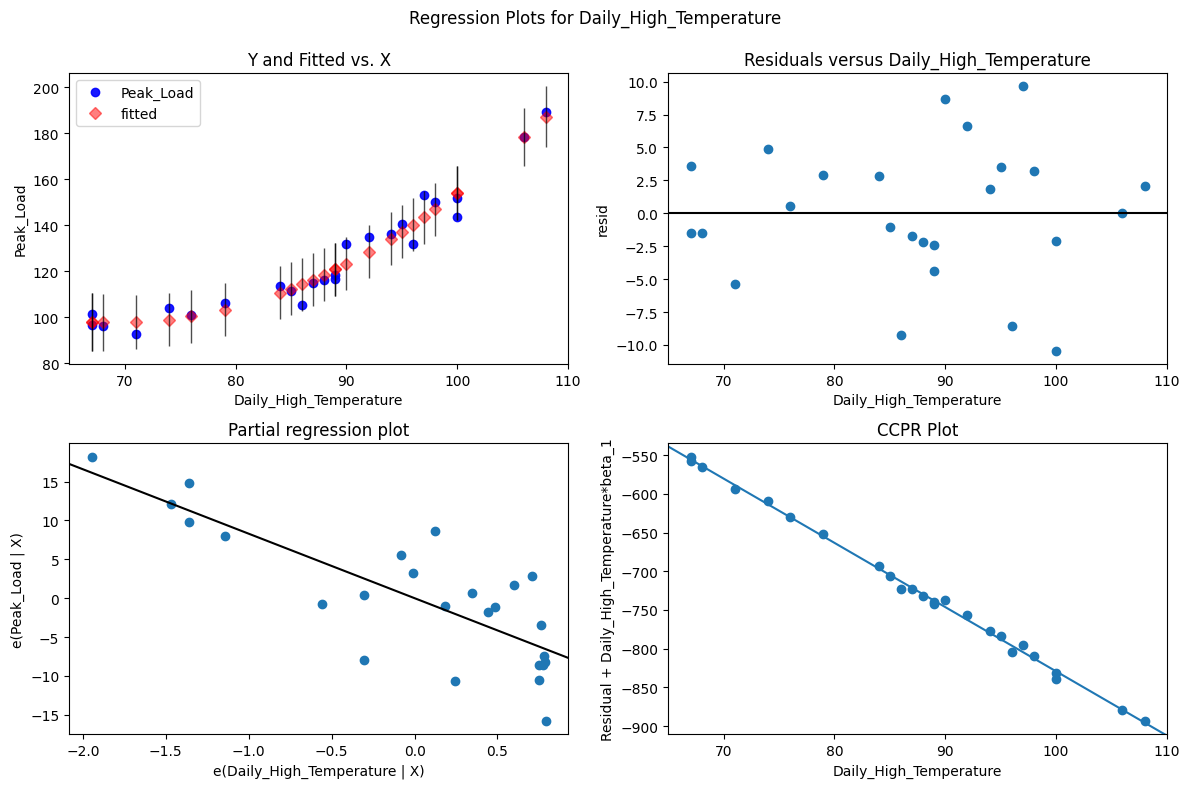

In [15]:
model = smf.ols(formula="Peak_Load ~ Daily_High_Temperature+I(Daily_High_Temperature**2)", data=df_new_peakpower)
results = model.fit() 
print(results.summary()) 

model = smf.ols(formula="Peak_Load ~ Daily_High_Temperature+I(Daily_High_Temperature**2)", data=df_new_peakpower).fit()
fig = plt.figure(figsize=(12,8)) 
fig = sm.graphics.plot_regress_exog(model, 'Daily_High_Temperature', fig=fig) 

### Q2-d
Please use your final equation to predict the peak power load on a summer day with high
temperature value of 100 degrees.
To predict the out of sample values, use model.predict(exog=dict(______))

In [16]:
model.predict(exog=dict(Daily_High_Temperature=100)) 
import numpy as np 
Xpredict = np.array([100]) 
model.predict(exog=dict(Daily_High_Temperature=Xpredict)) 

0    154.029097
dtype: float64